In [10]:
import pandas as pd
import seaborn as sns

In [171]:
df = pd.read_csv('customers.csv')

In [102]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [172]:
df.drop(columns = ["Channel", "Region"], inplace=True)

# EDA

In [5]:
df.shape

(440, 6)

In [7]:
df.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [9]:
df.duplicated().sum()

0

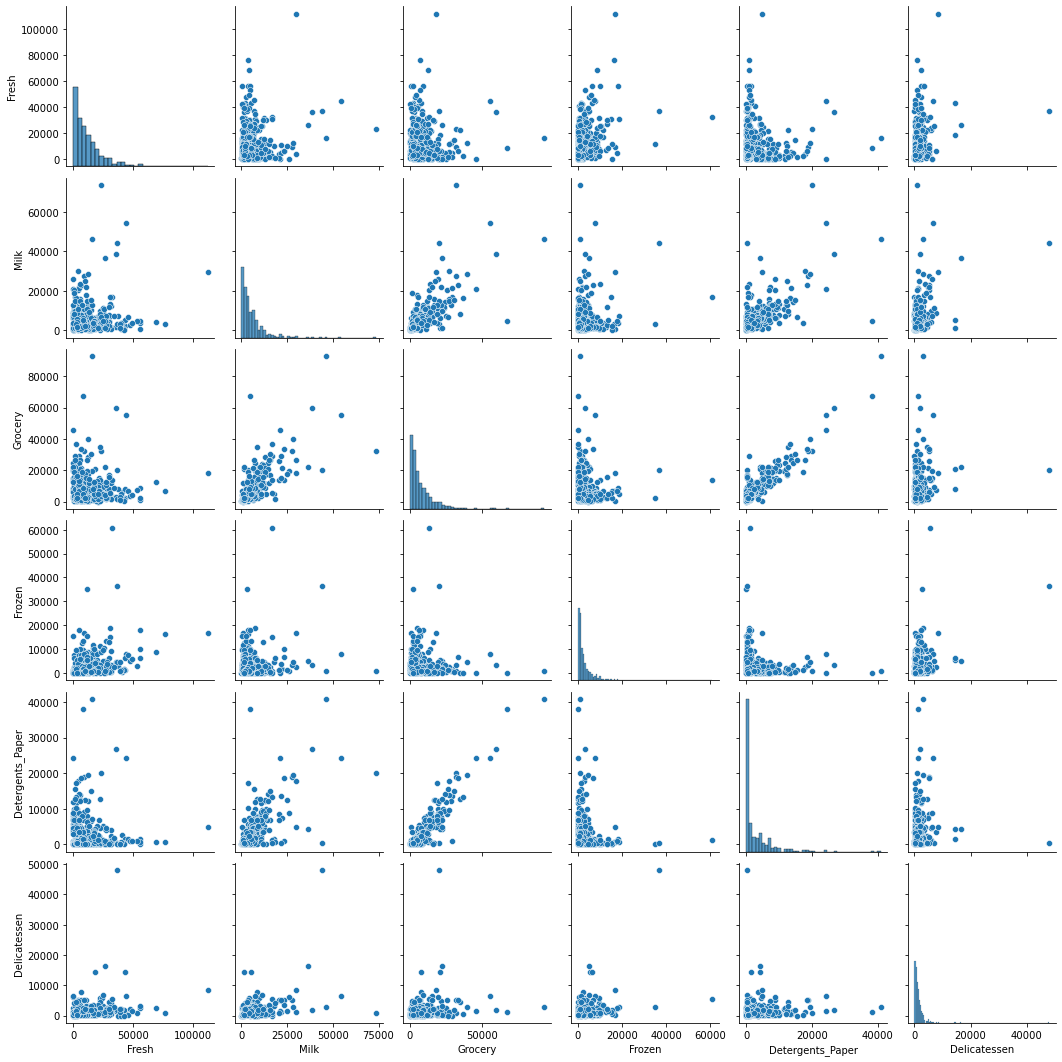

In [104]:
sns.pairplot(df)

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Milk'>

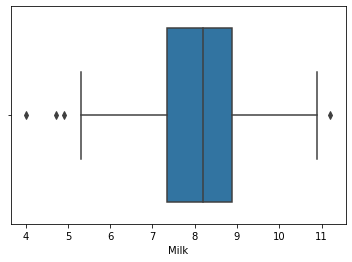

In [57]:
sns.boxplot(df['Milk'])

# Feature Scaling

In [174]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [25]:
df

array([[ 0.30168043,  1.06571214,  0.32995207, -0.46657183,  0.50678671,
         0.2638102 ],
       [-0.1048095 ,  1.09293385,  0.56599336,  0.08392603,  0.67567015,
         0.5740085 ],
       [-0.15580183,  0.91581599,  0.34441798,  0.3125889 ,  0.73651183,
         4.87145892],
       ...,
       [ 0.43654933,  2.09660171,  2.99755961, -0.38726885,  3.826342  ,
         0.63845609],
       [ 0.12936404, -0.29095409, -0.29678633, -0.17354196, -0.176932  ,
         0.82117564],
       [-0.41409532, -0.34097839, -0.26409103, -0.51955903, -0.0926267 ,
        -0.64695467]])

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = scaler.fit_transform(new_df)

In [44]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df = scaler.fit_transform(new_df)


# LOG TRANSFORMATION

In [48]:
import numpy as np

In [173]:
df = np.log(df)

In [54]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


# PCA

In [28]:
from sklearn.decomposition import PCA

In [155]:
pca = PCA(n_components=2)

In [156]:
df_new = pd.DataFrame(pca.fit_transform(df), columns=['A','B'])

In [165]:
df_new['label'] = np.where(df['label'] == 0, 0, 1)

In [168]:
df_new

,A,B,label
0,-1.379375,0.303838,0
1,-1.434807,-0.538147,0
2,-1.503951,-1.226153,0
3,0.824133,-1.205770,1
4,-0.797388,-1.756986,0
...,...,...,...
435,-0.590633,-2.260681,0
436,2.149349,-1.687197,1
437,-2.844392,-0.195943,0
438,1.009603,-0.448111,1


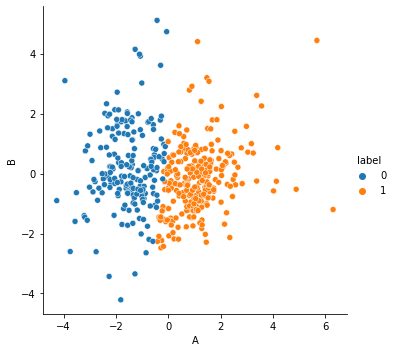

In [170]:
sns.relplot(data=df_new, x='A', y='B', hue='label')

# KMEANS CLUSTERING

In [62]:
from sklearn.cluster import KMeans

In [149]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [150]:
wcss

[2640.0000000000005,
 1847.9950211259368,
 1558.0896698633994,
 1392.2228976496892,
 1271.2785529288496,
 1179.1021852615609,
 1090.3944502173226,
 1025.9975556423738,
 982.8637935655045,
 931.1103814642154]

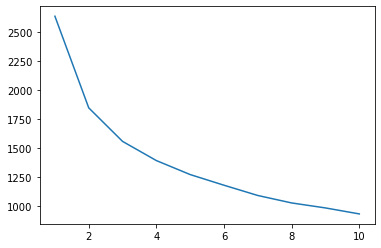

In [151]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)

In [152]:
km = KMeans(n_clusters=2)
y_means = km.fit_predict(df)

In [111]:
y_means

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,

In [160]:
df = pd.DataFrame(df)

In [162]:
df['label'] = pd.DataFrame(y_means)

In [164]:
df.iloc[:,-1]

0      0
1      0
2      0
3      1
4      0
      ..
435    0
436    1
437    0
438    1
439    1
Name: label, Length: 440, dtype: int32

In [123]:
(pd.DataFrame(df[y_means == 0])).describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,13973.126984,2401.750000,2918.706349,3705.670635,491.944444,1038.043651
std,12737.135814,2044.968001,1971.418813,4271.087730,556.483850,960.081920
min,3.000000,55.000000,3.000000,47.000000,3.000000,3.000000
25%,5318.500000,1032.000000,1616.250000,909.750000,166.500000,378.750000
50%,10347.500000,1871.000000,2406.000000,2225.000000,327.500000,749.500000
75%,18725.750000,3290.250000,3812.750000,4852.500000,629.500000,1379.500000
max,76237.000000,16687.000000,12609.000000,35009.000000,4762.000000,5864.000000


In [124]:
(pd.DataFrame(df[y_means == 1])).describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,9355.867021,10346.361702,14697.063830,2222.452128,6084.505319,2177.425532
std,12061.304371,9269.205028,11265.683147,5438.339102,5911.178384,4084.812780
min,3.000000,1266.000000,1660.000000,25.000000,93.000000,3.000000
25%,2100.000000,5392.250000,8036.250000,435.750000,2573.250000,554.500000
50%,5406.500000,7690.500000,11527.000000,1061.500000,4495.000000,1388.500000
75%,12213.250000,11583.000000,18266.500000,2235.500000,7148.750000,2381.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [72]:
from sklearn.metrics import silhouette_score

In [153]:
score = silhouette_score(df, y_means)

In [154]:
score

0.28958566834148963

In [81]:
score=0
for i in range(10):
    km = KMeans(n_clusters=2)
    y_means = km.fit_predict(df)
    score+=silhouette_score(df, y_means)
score/10

0.2897216176455389

# HIERARCHICAL CLUSTERING

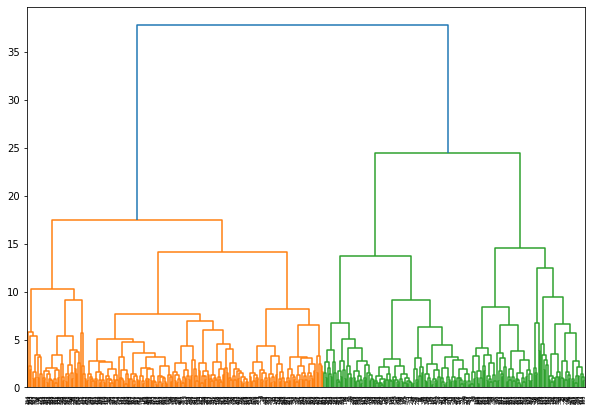

In [95]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [93]:
from sklearn.cluster import AgglomerativeClustering

In [96]:
clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [97]:
y_pred = clustering.fit_predict(df)

In [98]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,

In [99]:
score = silhouette_score(df, y_pred)

In [100]:
score

0.2629249016127347

# DBSCAN

In [82]:
from sklearn.cluster import DBSCAN

In [140]:
dbscan = DBSCAN(eps=1, min_samples=5)

In [141]:
pred = dbscan.fit_predict(df)

In [142]:
pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1, -1,  0,
       -1,  0,  0, -1, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0, -1,  0,  0,  0, -1,  0, -1, -1, -1, -1, -1,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
        0, -1, -1,  0,  0, -1, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1,
       -1,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1, -1,  0,
       -1,  0,  0,  0,  0

In [143]:
score = silhouette_score(df, pred)

In [144]:
score

0.1804825480146559

In [57]:
import numpy as np
import matplotlib.pyplot as plt
plot_id=0
for eps in np.arange(0.3,0.9,0.2):
    for min_samples in range(3,9):
        plot_id+=1
        cl=DBSCAN(eps=eps,min_samples = min_samples)
        result=cl.fit_predict(new_df)
        n_clusters=len([c for c in list(set(result)) if c!=-1])
        plt.subplot(6,4,plot_id)
        plt.scatter(new_df.Dim1.values.tolist(),new_df.Dim2.values.tolist(),
                   cmap=cmap,
                   c=result)
        fig,ax=plt.gcf(),plt.gca()
        fig.set_size_inches(15,20)
        plt.title('eps: '+str(eps)+', min_smp:'+str(min_samples)+',\n# of clusters: '+str(n_clusters))
        plt.tight_layout()
        
plt.show()

TypeError: 'Index' object is not callable